In this Notebook, I will explain how to create a profile of voter with embeddings.

In [1]:
import embedded_voting as ev
import numpy as np
import matplotlib.pyplot as plt

# My first profile

Let's first create a simple profile of voter for an election with $m = 6$ candidates and $d = 3$ dimensions for the embeddings.

In [2]:
n_candidates = 5
n_dimensions = 3
my_profile = ev.Profile(n_candidates, n_dimensions)

## Add voters

There is **several ways** to create a profile of voters.

First, you can add *a group of voters* by manually specifying the embeddings and the preferences of theses voters. The embeddings are automatically normalized (unless you specify otherwise). In the following cell, the scores given by the voters to the candidates are drawn uniformly at random.

In [3]:
embeddings = np.array([[.9,0,.1],
              [.8,.1,0],
              [.1,.1,.9],
              [0,.2,.8],
              [0,1,0],
              [.2,.3,.2],
              [.5,.1,.9]])
scores = np.random.rand(7, n_candidates)
my_profile.add_voters(embeddings, scores, normalize_embs=True)

You can also add voters *one by one*, as it is shown on the following cell. Here I am creating a group of $20$ voters with very similar embeddings and preferences.

In [4]:
for i in range(20):
    embedding = [.8,.2,.2] + np.random.randn(3)*0.02
    score = np.abs([1,0.8,0.5,0.2,0] + np.random.randn(n_candidates)*0.01)
    my_profile.add_voter(embedding, score, normalize_embs=True)

Finally, you can add voters *uniformly distributed* on the positive orthan, with random scores. The following cell add 25 of such voters.

In [5]:
my_profile.uniform_distribution(25)

## Visualize the profile

Now that we have a profile, we want to visualize it. Since the number of embeddings dimensions is only 3 in our profile, we can easily plot it on a figure.  There is two way of plotting your profile, using a "3D" plot or a "ternary" plot :
   * On the 3D plot, each voter is represented by a line from the origin to its position on the unit sphere.
   * On the ternary plot, the surface of the unit sphere is represented in 2D

On the following figures we can see the red group of voters which corresponds to the 20 voters with similar embeddings I added above.

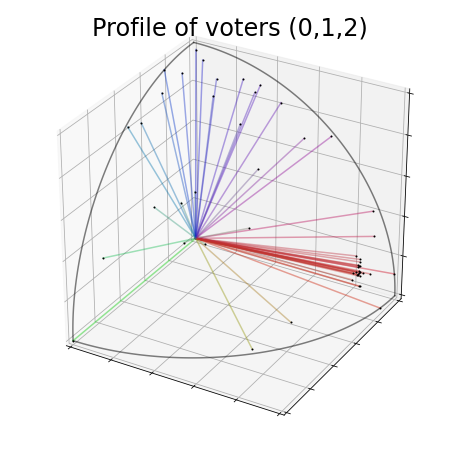

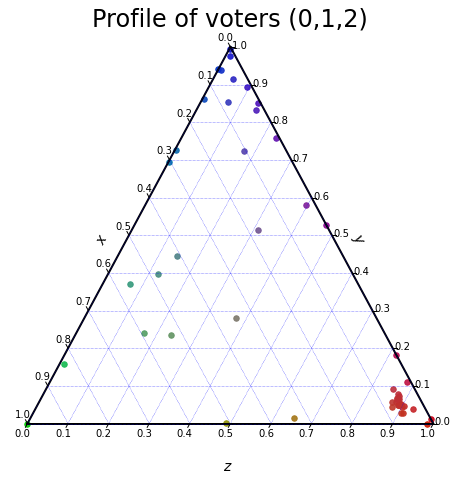

TernaryAxesSubplot: -9223371917401614269

In [6]:
my_profile.plot_profile("3D")
my_profile.plot_profile("ternary")

You can also plot the two figures side by side :

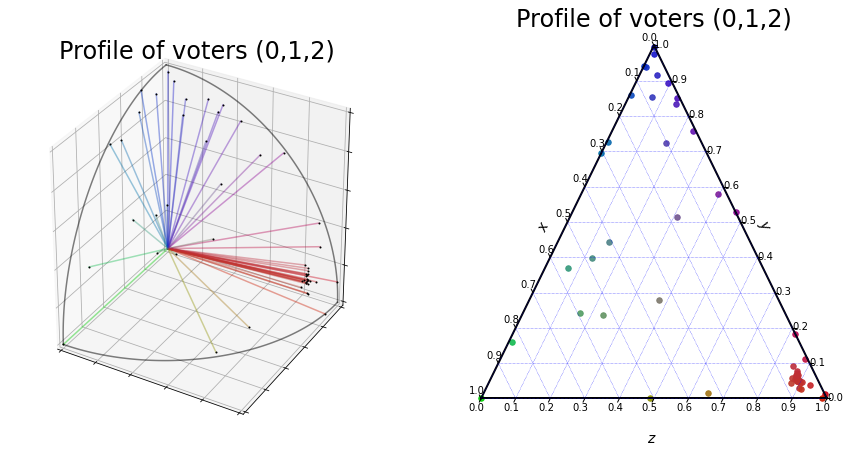

In [7]:
fig = plt.figure(figsize=(15,7.5))
my_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
my_profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

## Visualize the candidates

With the same idea, you can visualize the candidates.
   * On a 3D plot, the score given by a voter to a candidate is represented by the **size of its vector**.
   * On a ternary plot, the score given by a voter to a candidate is represented by the **size of the dot**.

Use \texttt{plot_candidate} to plot only one candidate and \texttt{plot_candidates} to plot all the candidates. On the following plots, we can see that the red group really like the first candidate and don't like the last candidate.D

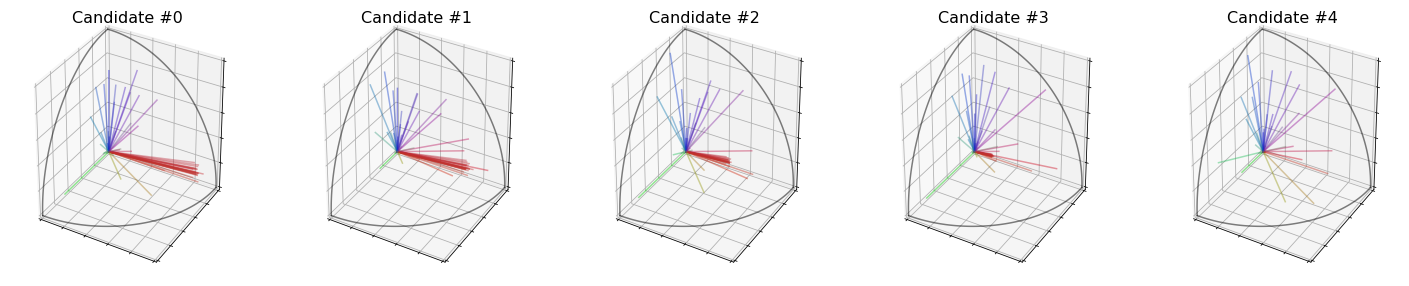

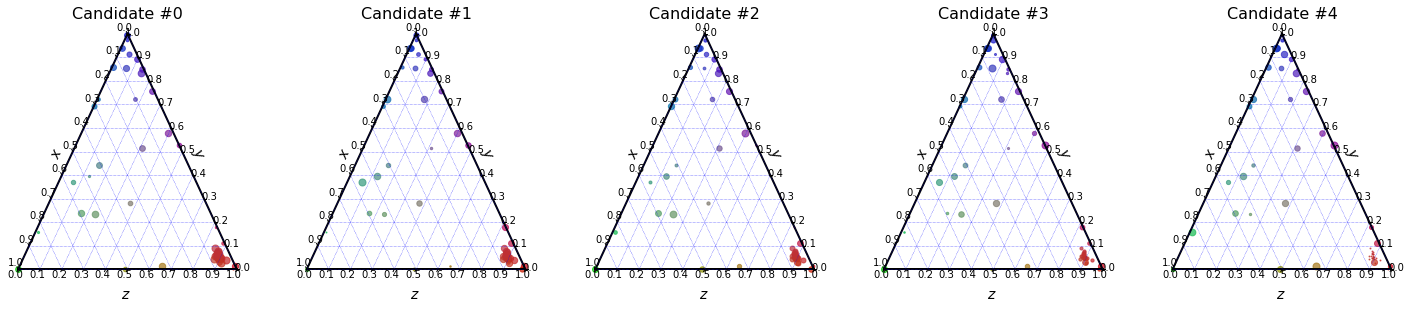

In [8]:
my_profile.plot_candidates("3D")
my_profile.plot_candidates("ternary")

# Beyond 3 dimensions

What if the profile has more than 3 dimensions ? 

In [9]:
my_big_profile = ev.Profile(5,4)
my_big_profile.uniform_distribution(50)

We use the functions described above and specify which dimensions to use on the plots (we need 3 dimensions). By default, the function use the first three dimensions.

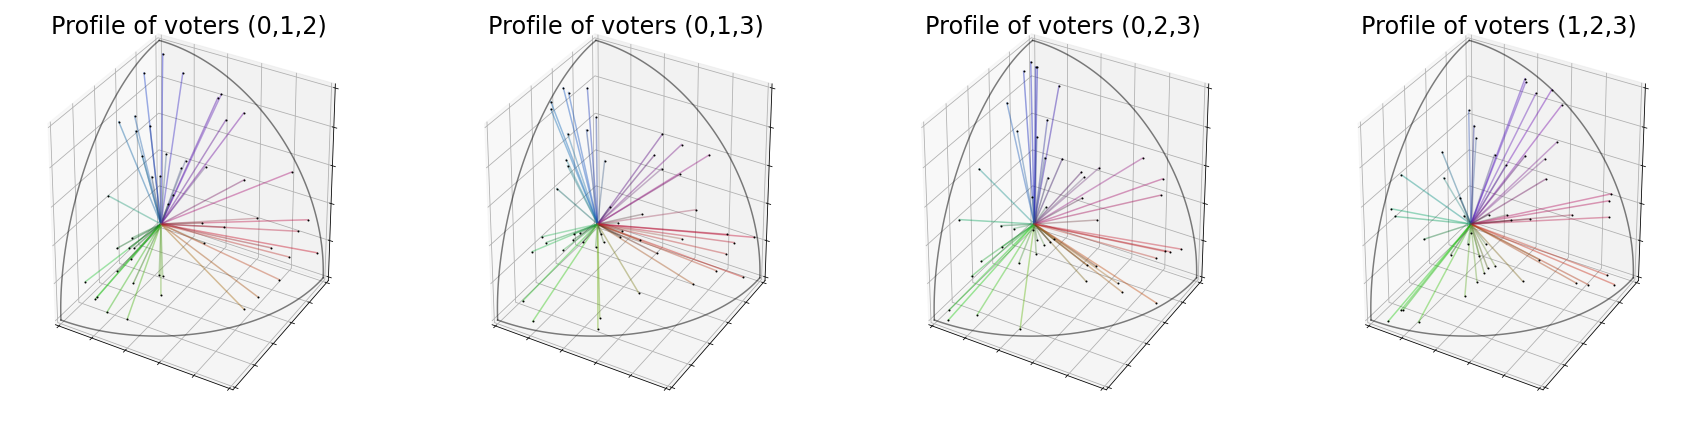

In [10]:
fig = plt.figure(figsize=(30,7.5))
my_big_profile.plot_profile("3D", dim=[0,1,2], fig=fig, position=[1,4,1], show=False)
my_big_profile.plot_profile("3D", dim=[0,1,3], fig=fig, position=[1,4,2], show=False)
my_big_profile.plot_profile("3D", dim=[0,2,3], fig=fig, position=[1,4,3], show=False)
my_big_profile.plot_profile("3D", dim=[1,2,3], fig=fig, position=[1,4,4], show=False)
plt.show()

# Copy profile

Here is a simple command to get a copy of your profile.

In [11]:
my_profile_bis = my_profile.copy()

For the moment, the two profile are the same :

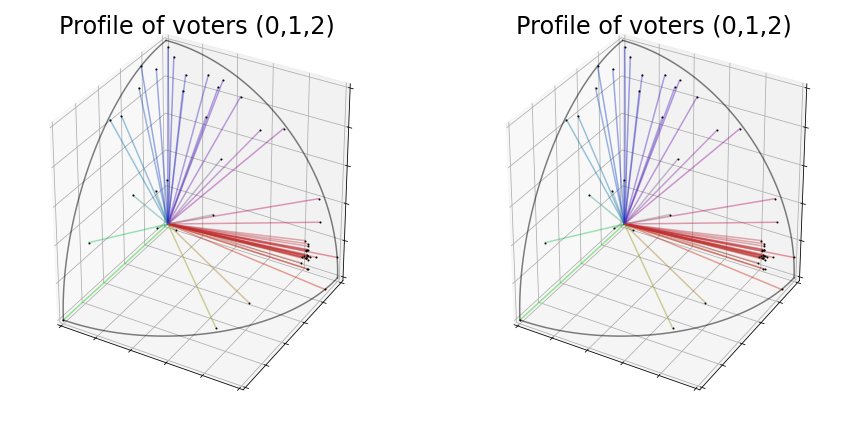

In [12]:
fig = plt.figure(figsize=(15,7.5))
my_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
my_profile_bis.plot_profile("3D", fig=fig, position=[1,2,2], show=False)
plt.show()

Now let's add 100 voters to my new profile :

In [13]:
my_profile_bis.uniform_distribution(100)

The new voters only appears on the second profile :

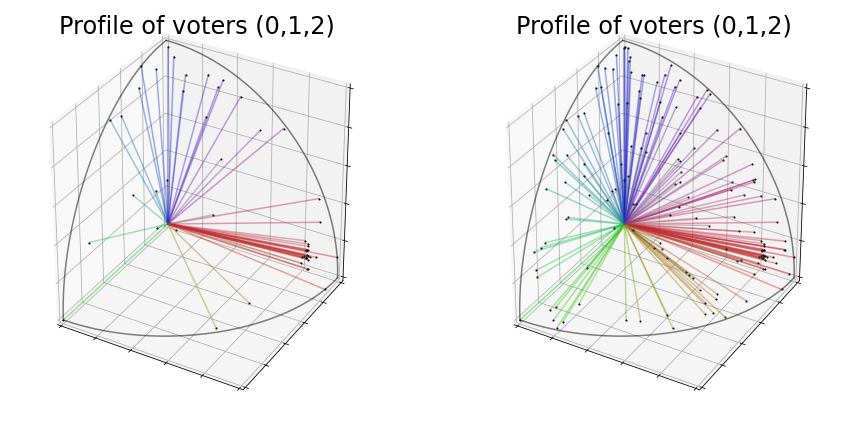

In [14]:
fig = plt.figure(figsize=(15,7.5))
my_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
my_profile_bis.plot_profile("3D", fig=fig, position=[1,2,2], show=False)
plt.show()

# Dilate the profile

Sometimes the voters' embeddings are really close and it is hard to do anything with the profile, because it looks like every voter is the same. For instance, I can create three groups of voters with very similar embeddings :

In [15]:
small_profile = ev.Profile(n_candidates, n_dimensions)
embeddings = np.array([[.5,.4,.4],[.4,.4,.5],[.4,.5,.4]])
scores = np.random.rand(3, n_candidates)
small_profile.add_voters(embeddings, scores, normalize_embs=True)

If I plot this profile, the three voters are really close to each other :

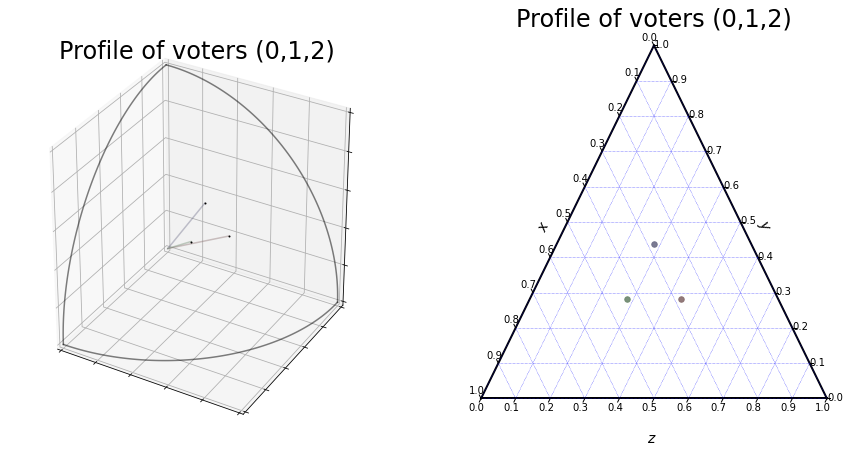

In [16]:
fig = plt.figure(figsize=(15,7.5))
small_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
small_profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

Now, what if we take this voter and "dilate" the profile in such a way that the relative distance between them remains the same but they take all the space they can on the positive ortan. To do so, we use the funtion \texttt{dilate_profile}. 

In [17]:
small_profile_dilated = small_profile.copy()
small_profile_dilated.dilate_profile()

As you can see on the second plot, voters are pushed to the extreme positions of the ortan.

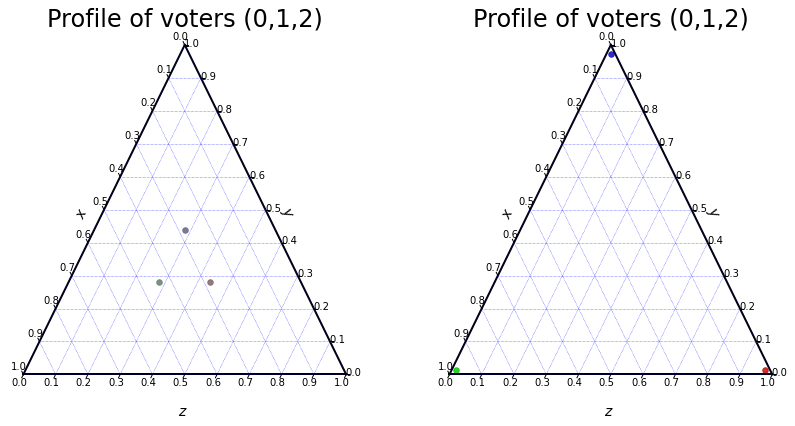

In [18]:
fig = plt.figure(figsize=(14,7))
small_profile.plot_profile("ternary", fig=fig, position=[1,2,1], show=False)
small_profile_dilated.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()